In [1]:
import sys
import os

In [2]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import dtreeviz
random_state = 1234

# Load Sample Data

In [4]:
df= pd.read_csv('C:/Users/DELL/OneDrive/Desktop/dataset/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.fillna({'Age':df.Age.mean()},inplace = True)

In [7]:
df['Sex_Label'] = df.Sex.astype('category').cat.codes
df['Cabin_Label'] = df.Cabin.astype('category').cat.codes
df['Embarked_Label'] = df.Embarked.astype('category').cat.codes

In [8]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_Label  Cabin_Label  \
0      0         A/5 21171   7.2500   NaN        S          1           -1   
1      0          PC 17599  71.2833   C85        C          0           81   
2      0  STON/O2. 3101282   7.9250   NaN        S          0           -1   
3      0            113803  53.1000  C123        S          0           55   
4      0            373450   8.0500   NaN        S          1           -1   

   Embarked_Label  
0               2  
1               0  
2               2  
3               2  
4               2

# Classifiers

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Label',
       'Cabin_Label', 'Embarked_Label'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Sex_Label           0
Cabin_Label         0
Embarked_Label      0
dtype: int64

In [11]:
features = ['Pclass','Age','Fare', 'Sex_Label','Cabin_Label', 'Embarked_Label']
target = 'Survived'

In [12]:
tree_classifier = DecisionTreeClassifier(max_depth = 3,random_state = random_state)
tree_classifier.fit(df[features].values, df[target].values)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [13]:
viz_model = dtreeviz.model(tree_classifier,
                          X_train = df[features],
                          y_train = df[target],
                          feature_names = features,
                          target_name = target,
                          class_names = ['perish','survive'])

# Tree structure visualizations

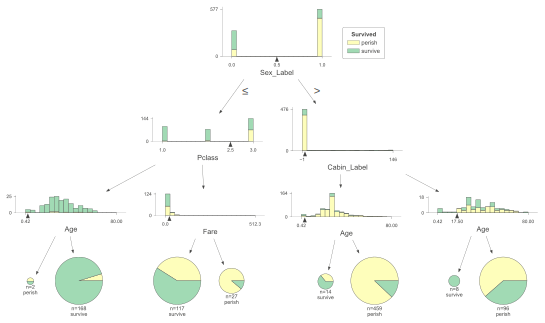

In [14]:
viz_model.view(scale = 0.8)

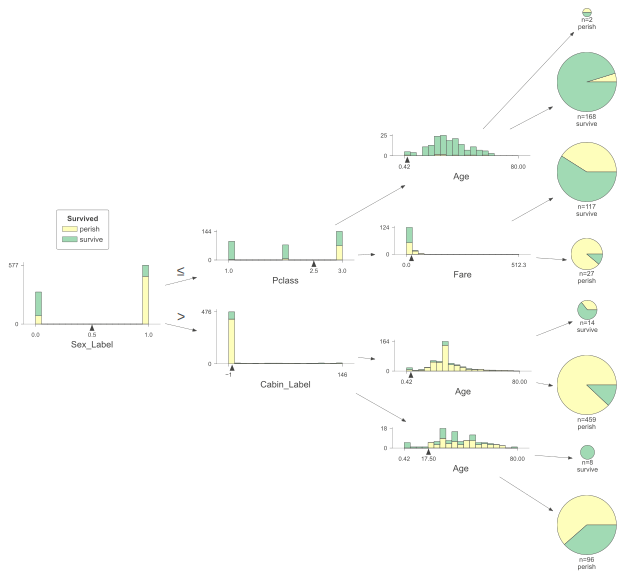

In [15]:
viz_model.view(orientation = 'LR')

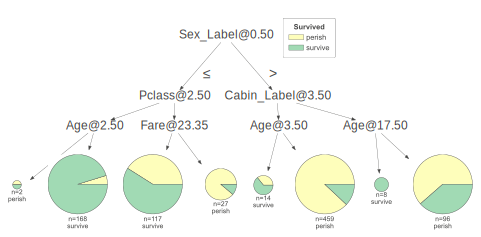

In [16]:
viz_model.view(fancy = False)

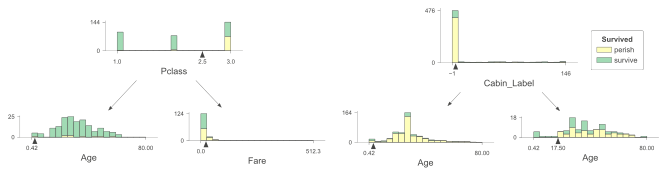

In [17]:
viz_model.view(depth_range_to_display = (1,2))

# Prediction path explanations

In [18]:
x = df[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_Label           0.0
Cabin_Label       145.0
Embarked_Label      2.0
Name: 10, dtype: float64

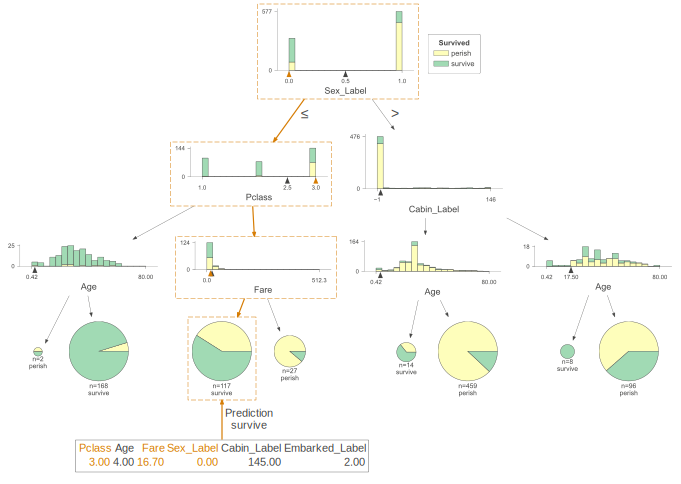

In [19]:
viz_model.view(x= x)

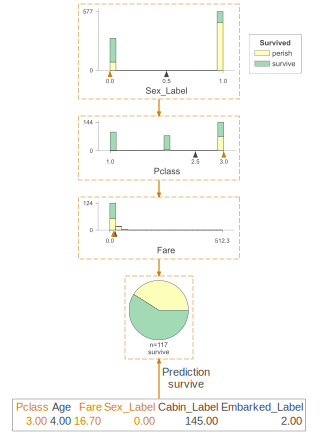

In [20]:
viz_model.view(x = x,show_just_path = True)

In [21]:
print(viz_model.explain_prediction_path(x))

2.5 <= Pclass 
Fare < 23.35
Sex_Label < 0.5



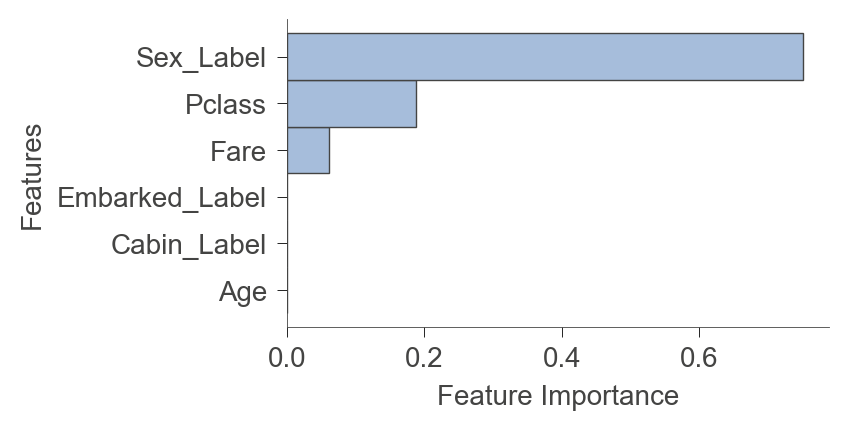

In [22]:
viz_model.instance_feature_importance(x, figsize=(3.5,2))

# leaf info

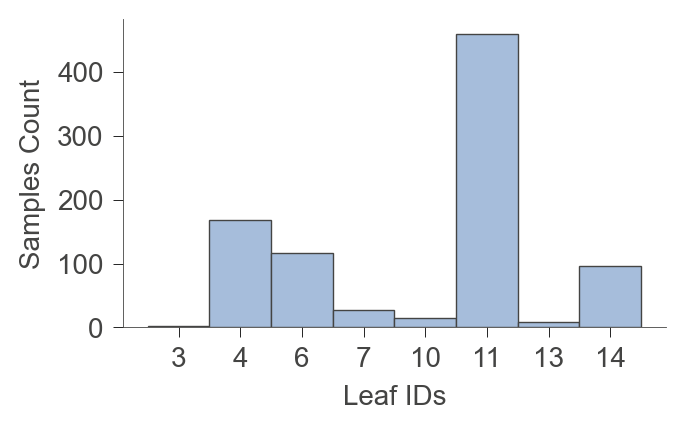

In [24]:
viz_model.leaf_sizes(figsize=(3.5,2))

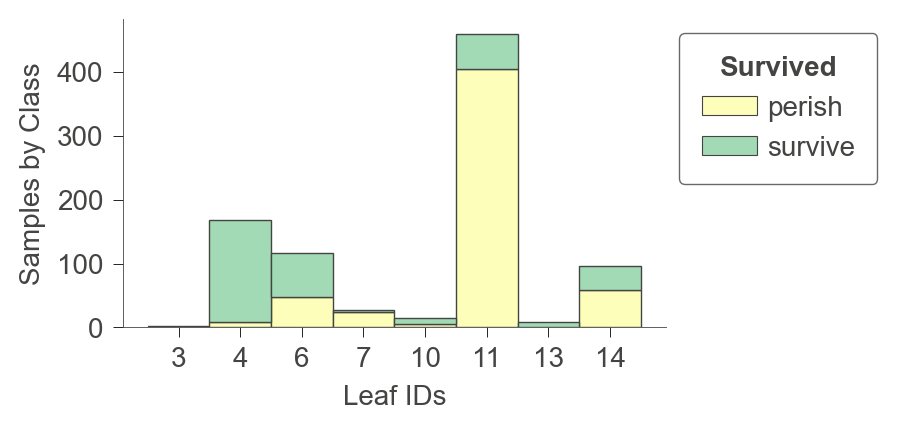

In [26]:
viz_model.ctree_leaf_distributions(figsize=(3.5,2))

In [27]:
viz_model.node_stats(node_id = 6)

Pclass         Age        Fare  Sex_Label  Cabin_Label  Embarked_Label
count   117.0  117.000000  117.000000      117.0   117.000000      117.000000
mean      3.0   23.976667   11.722829        0.0     6.196581        1.341880
std       0.0   10.534377    4.695136        0.0    31.167855        0.789614
min       3.0    0.750000    6.750000        0.0    -1.000000        0.000000
25%       3.0   18.000000    7.775000        0.0    -1.000000        1.000000
50%       3.0   27.000000    9.587500        0.0    -1.000000        2.000000
75%       3.0   29.699118   15.500000        0.0    -1.000000        2.000000
max       3.0   63.000000   23.250000        0.0   145.000000        2.000000

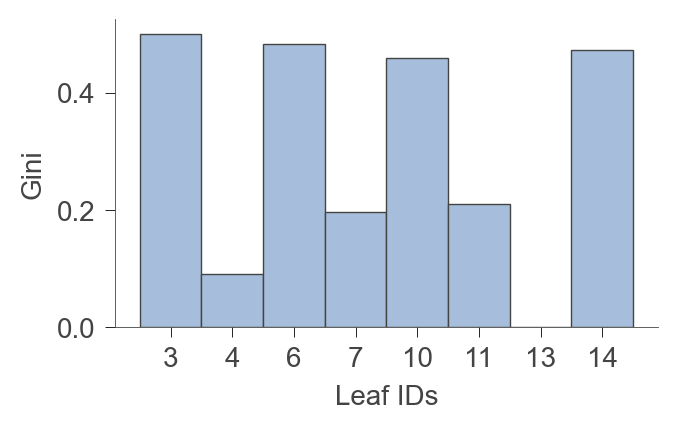

In [28]:
viz_model.leaf_purity(figsize=(3.5,2))

# Regressors

In [41]:
features_reg = ['Pclass','Fare', 'Sex_Label','Cabin_Label', 'Embarked_Label']
target_reg = 'Age'

In [42]:
tree_classifier = DecisionTreeRegressor(max_depth = 3,random_state = random_state,criterion = 'absolute_error')
tree_classifier.fit(df[features].values, df[target].values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

# Initialize dtreeviz model (adaptor)

In [43]:
viz_rmodel = dtreeviz.model(tree_classifier,
                          X_train = df[features],
                          y_train = df[target],
                          feature_names = features,
                          target_name = target
                          )

# Tree structure visualisations

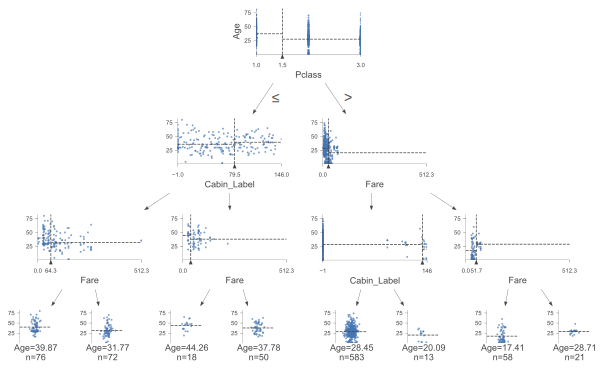

In [44]:
viz_rmodel.view()

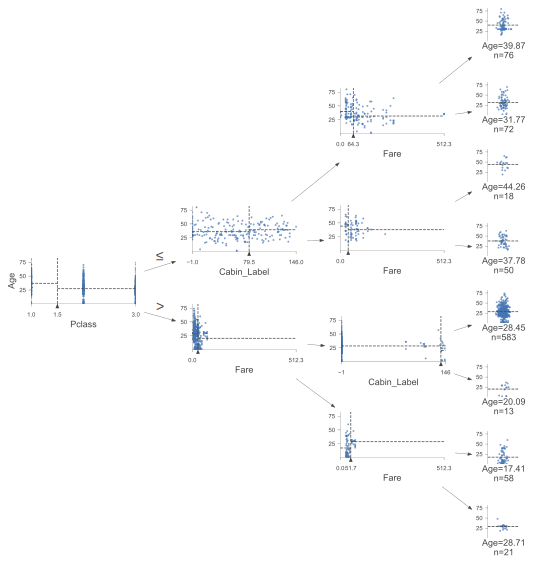

In [45]:
viz_rmodel.view(orientation = 'LR')

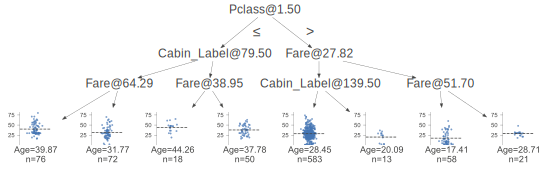

In [46]:
viz_rmodel.view(fancy = False)

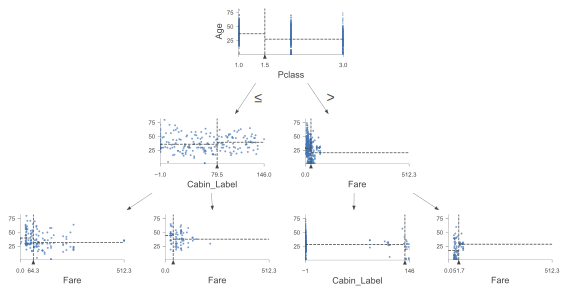

In [47]:
viz_rmodel.view(depth_range_to_display = (0,2))

# Prediction path explanations

In [49]:
x = df[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_Label           0.0
Cabin_Label       145.0
Embarked_Label      2.0
Name: 10, dtype: float64

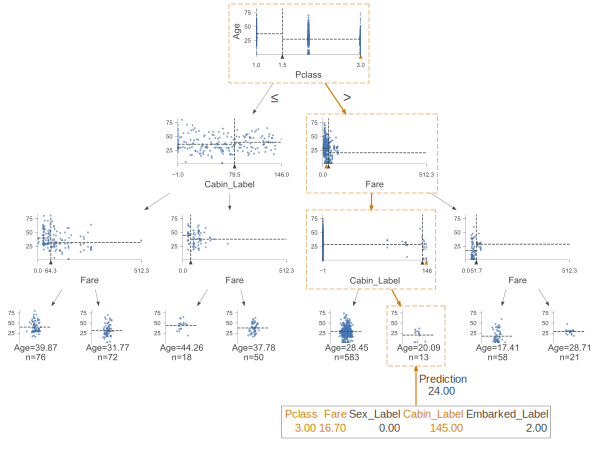

In [50]:
viz_rmodel.view(x=x)

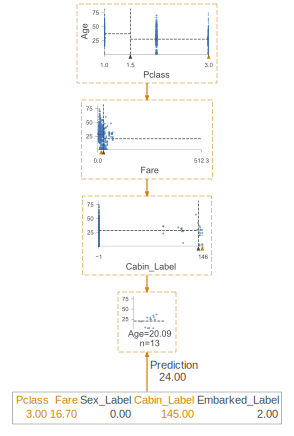

In [51]:
viz_rmodel.view(show_just_path = True,x=x)

In [53]:
print(viz_rmodel.explain_prediction_path(x))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_Label 



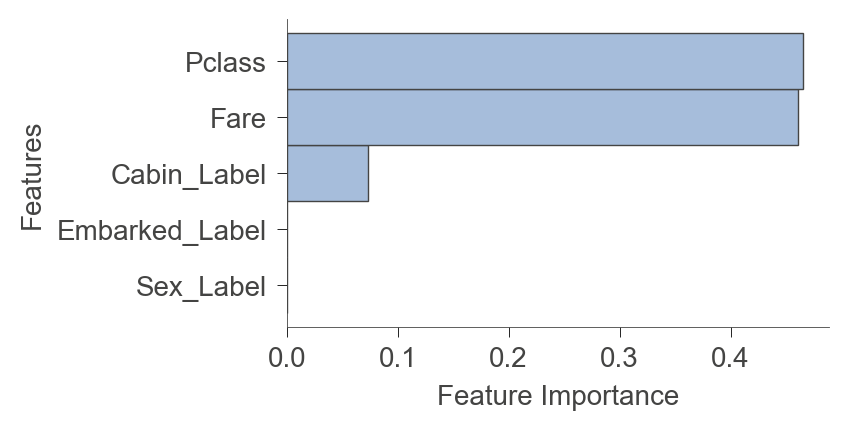

In [55]:
viz_rmodel.instance_feature_importance(x,figsize = (3.5,2))

# Leaf info

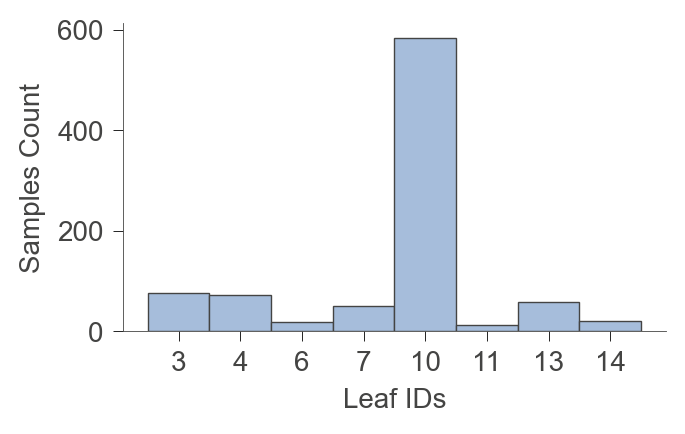

In [56]:
viz_rmodel.leaf_sizes(figsize=(3.5,2))

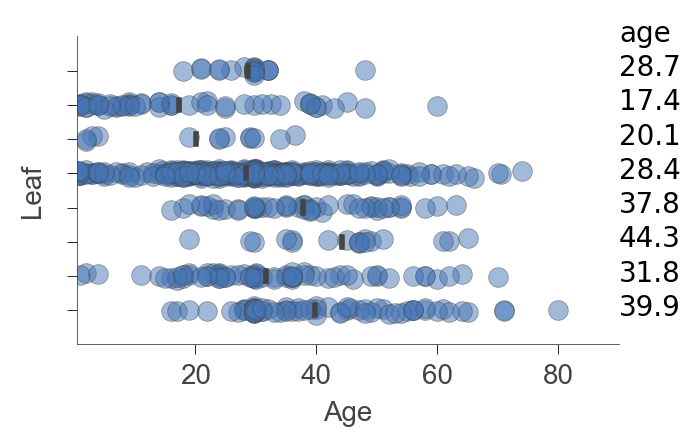

In [58]:
viz_rmodel.rtree_leaf_distributions(figsize=(3.5,2))

In [59]:
viz_rmodel.node_stats(node_id = 6)

Pclass       Fare  Sex_Label  Cabin_Label  Embarked_Label
count    18.0  18.000000  18.000000    18.000000            18.0
mean      1.0  28.640044   0.833333   114.777778             2.0
std       0.0   3.904728   0.383482    15.379725             0.0
min       1.0  25.587500   0.000000    83.000000             2.0
25%       1.0  26.287500   1.000000   106.250000             2.0
50%       1.0  26.550000   1.000000   118.000000             2.0
75%       1.0  30.000000   1.000000   121.000000             2.0
max       1.0  38.500000   1.000000   146.000000             2.0

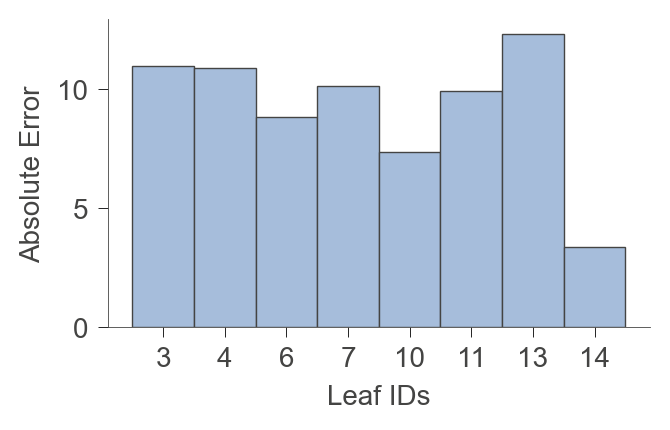

In [60]:
viz_rmodel.leaf_purity(figsize=(3.5,2))

# Feature Space Partitioning
Decision trees partition feature space in such a way as to maximize target value purity for the instances associated with a node. It's often useful to visualize the feature space partitioning, although it's not feasible to visualize more than a couple of dimensions.

## Classification
To visualize how it decision tree partitions a single feature, let's train a shallow decision tree classifier using the toy Iris data.

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()
features = list(iris.feature_names)
class_names = iris.target_names
X = iris.data
y = iris.target

In [80]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [81]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
dtc_iris = DecisionTreeClassifier(max_depth = 2,min_samples_leaf = 1,random_state = 666)
dtc_iris.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [83]:
viz_model = dtreeviz.model(dtc_iris,
                     X_train = X, y_train = y,
                     feature_names = features,
                     target_name = 'iris',
                     class_names = class_names)

In [84]:
viz_model

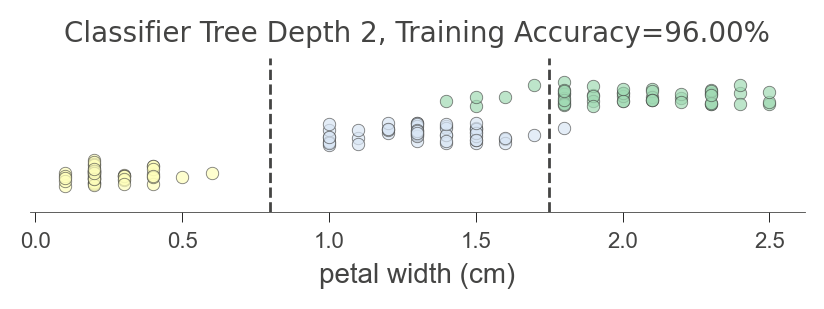

In [85]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal width (cm)'],
                             figsize=(5,1))

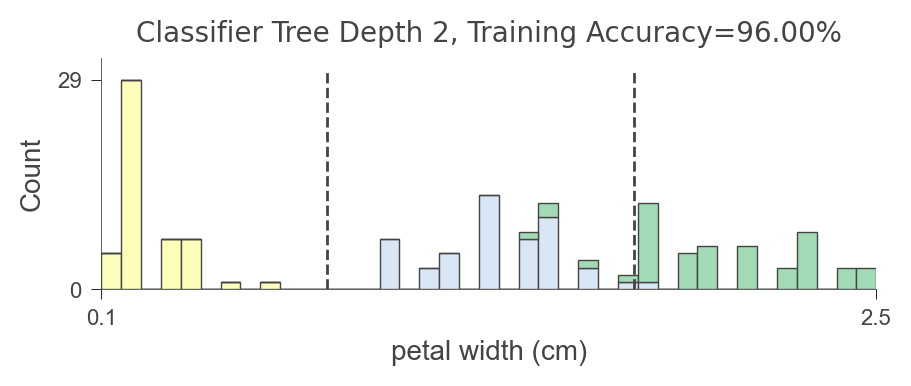

In [86]:
viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'}, features=['petal width (cm)'],
                             figsize=(5,1.5))

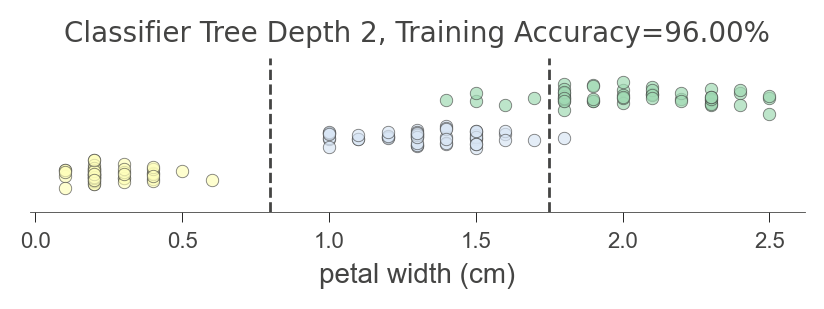

In [87]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal width (cm)'],
                              figsize=(5,1))

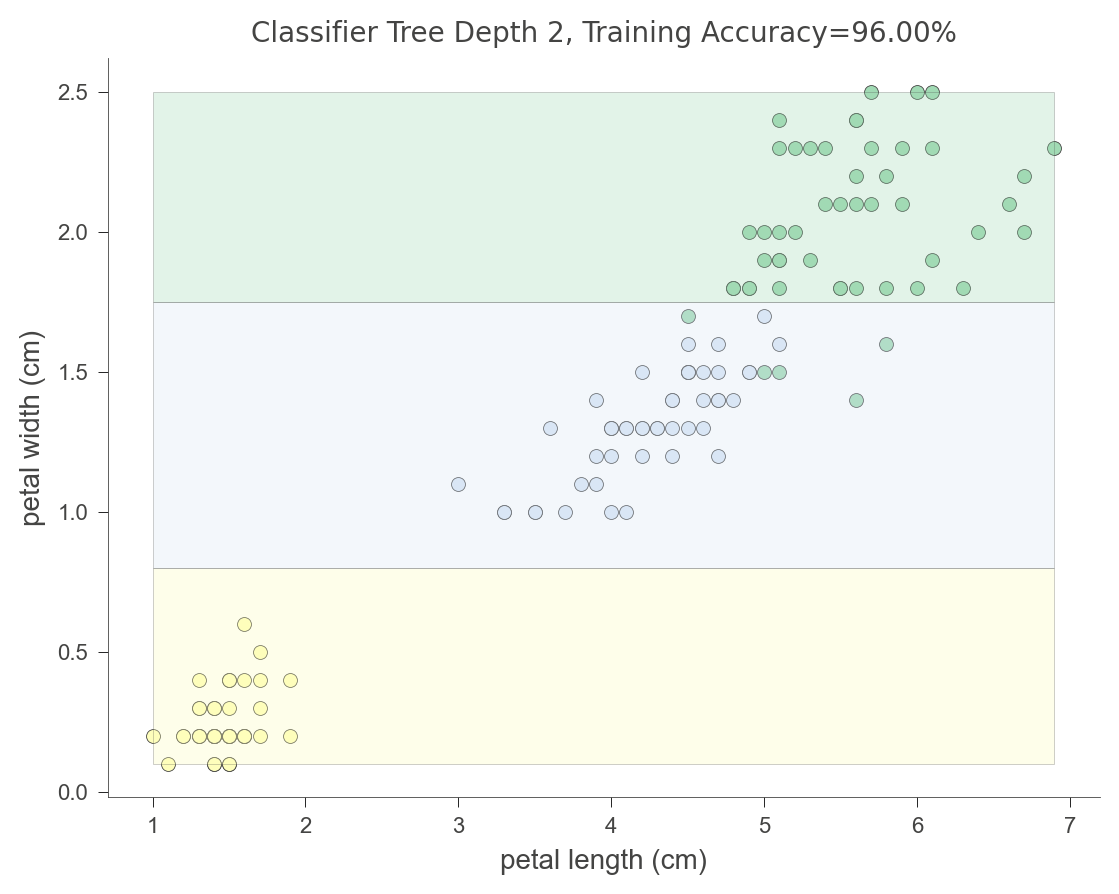

In [88]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal length (cm)', 'petal width (cm)'])

# Regression
To demonstrate regression, let's load a toy Cars data set and visualize the partitioning of univariate and bivariate feature spaces.

In [91]:
df_cars = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/dataset/cars (1).csv')
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = list(X.columns)

In [92]:
dtr_cars = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_cars.fit(X.values, y.values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [93]:
viz_rmodel = dtreeviz.model(dtr_cars, X, y,
                            feature_names=features,
                            target_name='MPG')

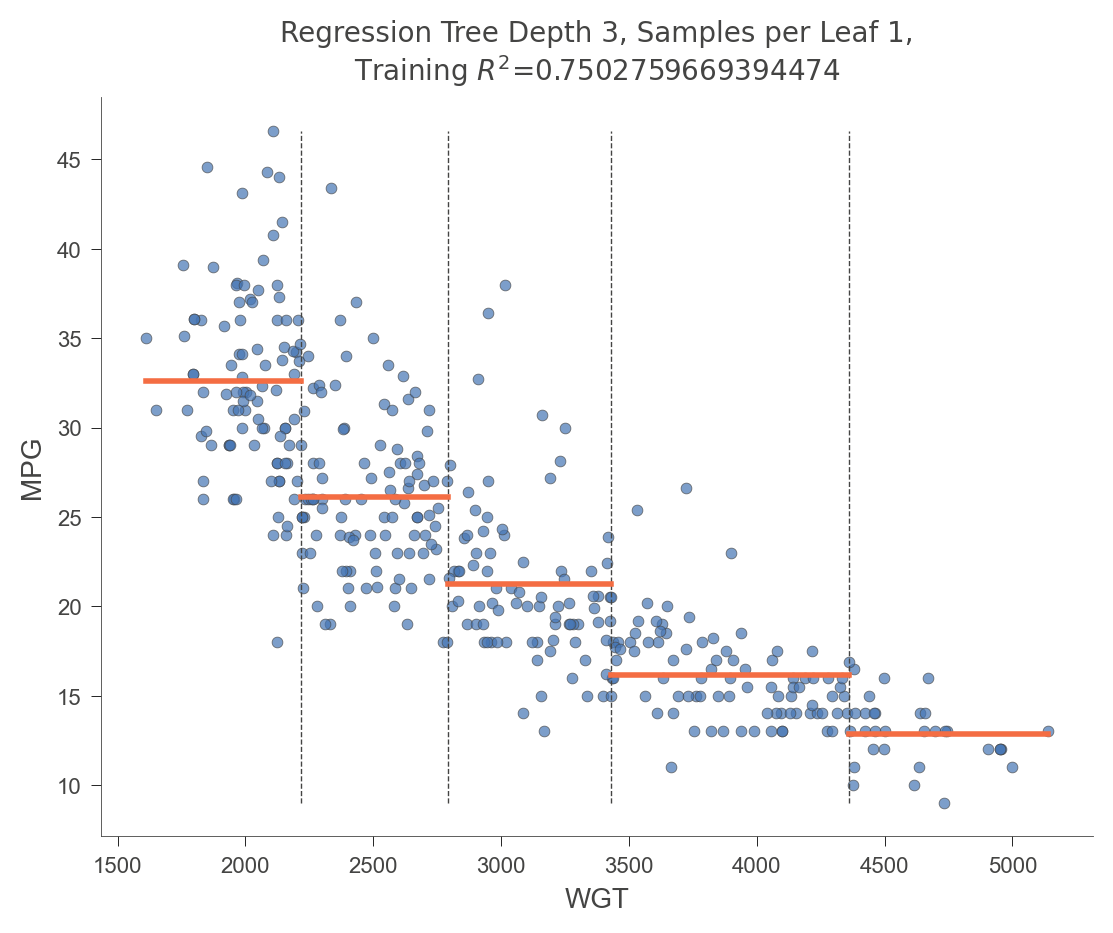

In [94]:
viz_rmodel.rtree_feature_space(features=['WGT'])

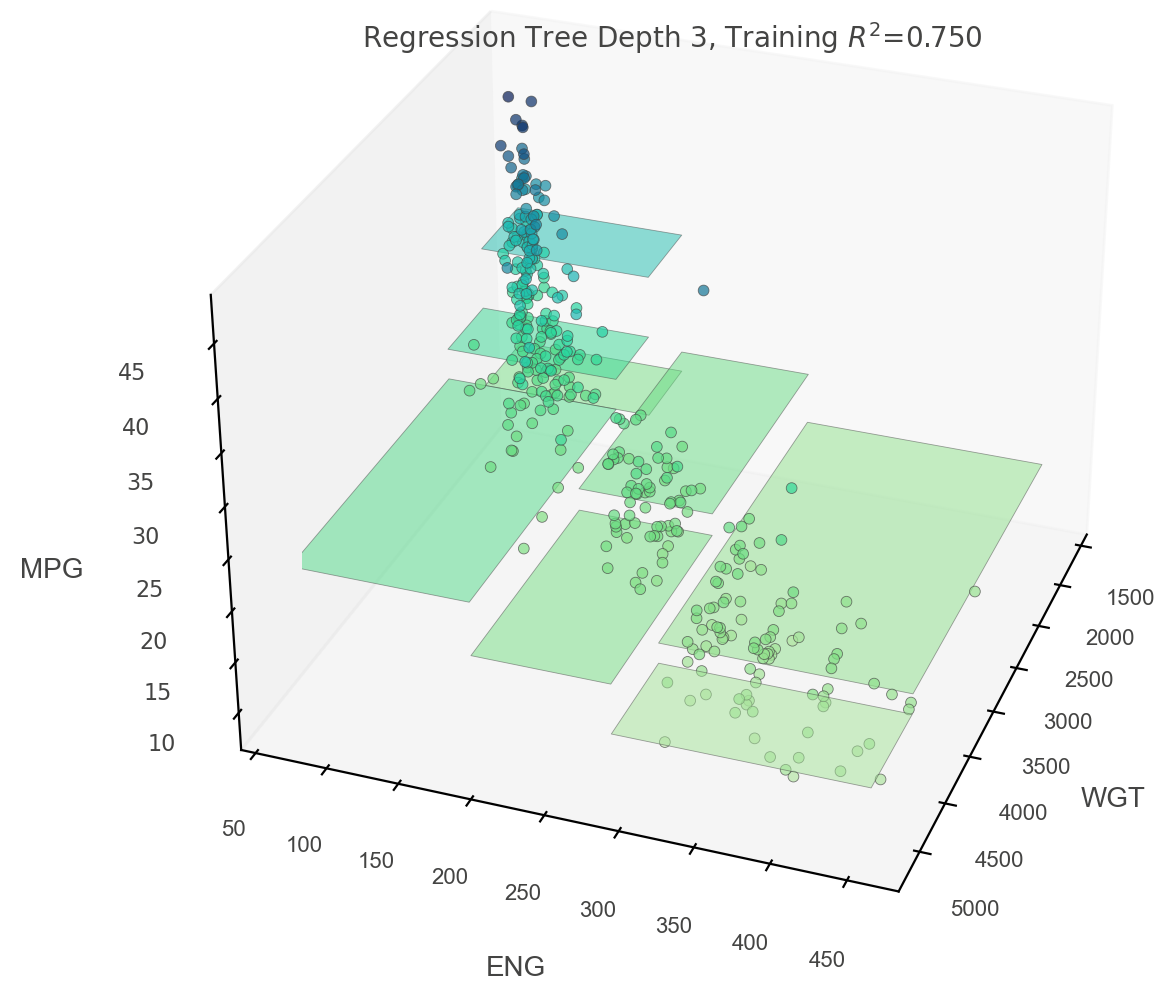

In [95]:
viz_rmodel.rtree_feature_space3D(features=['WGT','ENG'],
                                 fontsize=10,
                                 elev=30, azim=20,
                                 show={'splits', 'title'},
                                 colors={'tessellation_alpha': .5})

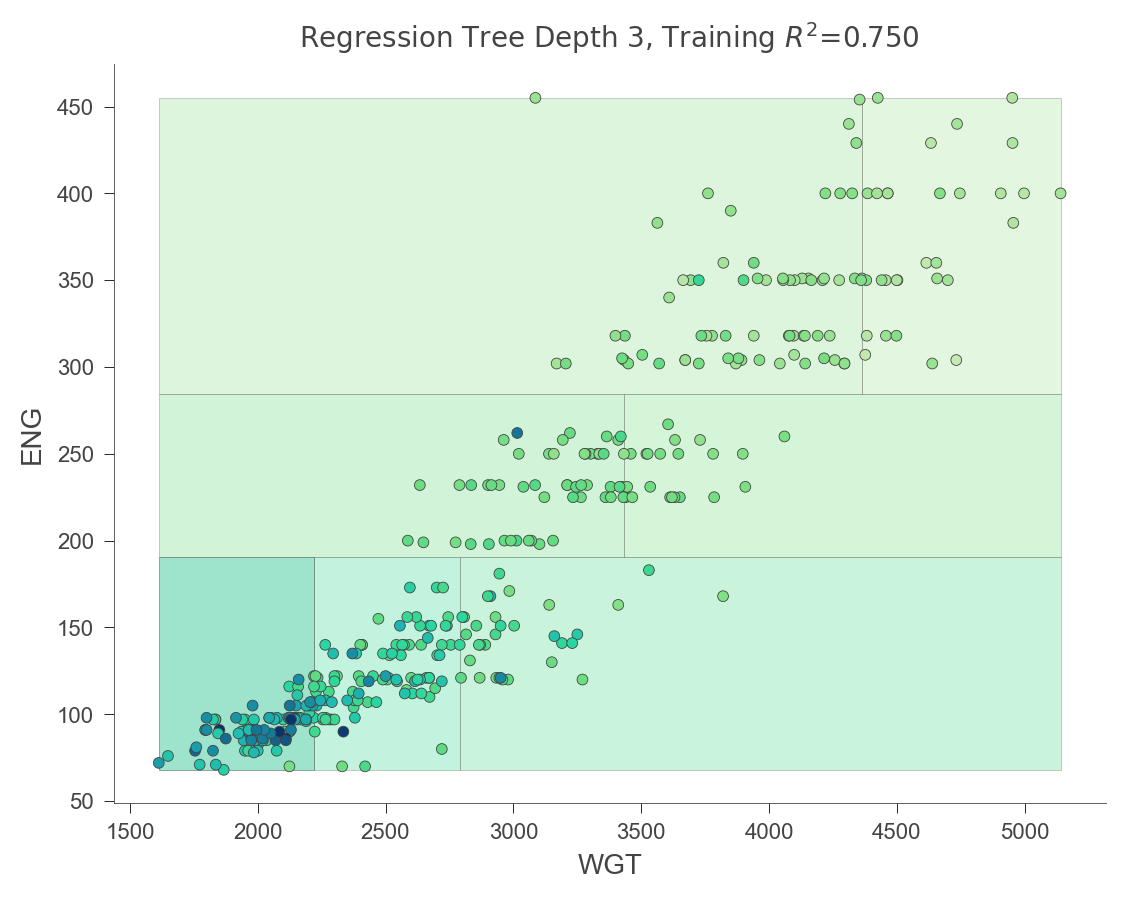

In [96]:
viz_rmodel.rtree_feature_space(features=['WGT','ENG'])